In [11]:
pip install pandas numpy matplotlib seaborn scipy

Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd
df = pd.read_csv(r"C:\002\JP\infosys\diabetes_prediction_dataset.csv")

In [29]:
print(df.info())  
print(df.describe())
print(df.head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.6

In [31]:
#find missing value
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


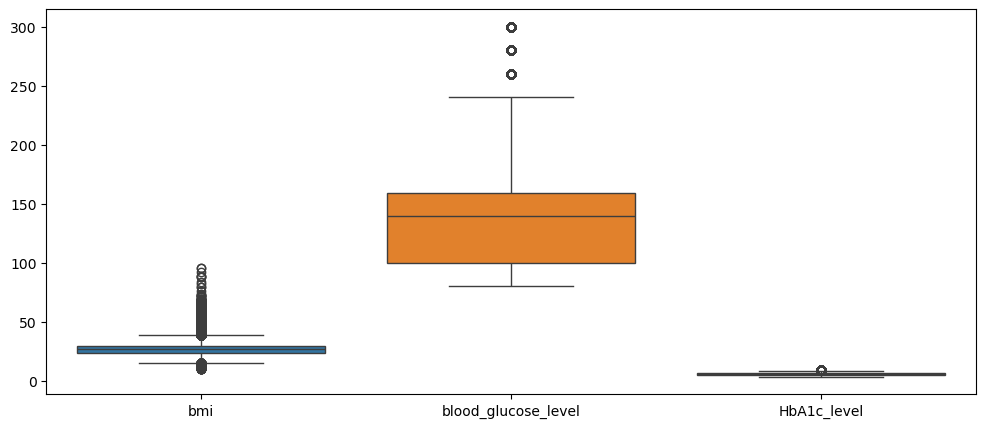

In [19]:
#Detect outliers in numerical columns
import matplotlib.pyplot as plt  
import seaborn as sns
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[['bmi', 'blood_glucose_level', 'HbA1c_level']])
plt.show()

In [33]:
#Analyze categorical distributions
print(df['gender'].value_counts())
print(df['smoking_history'].value_counts())

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


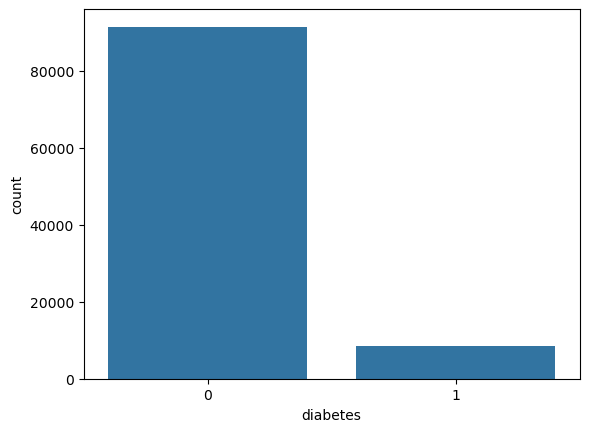

In [35]:
#Counts on 0s and 1s in Diabetes
sns.countplot(x='diabetes', data=df)
plt.show()

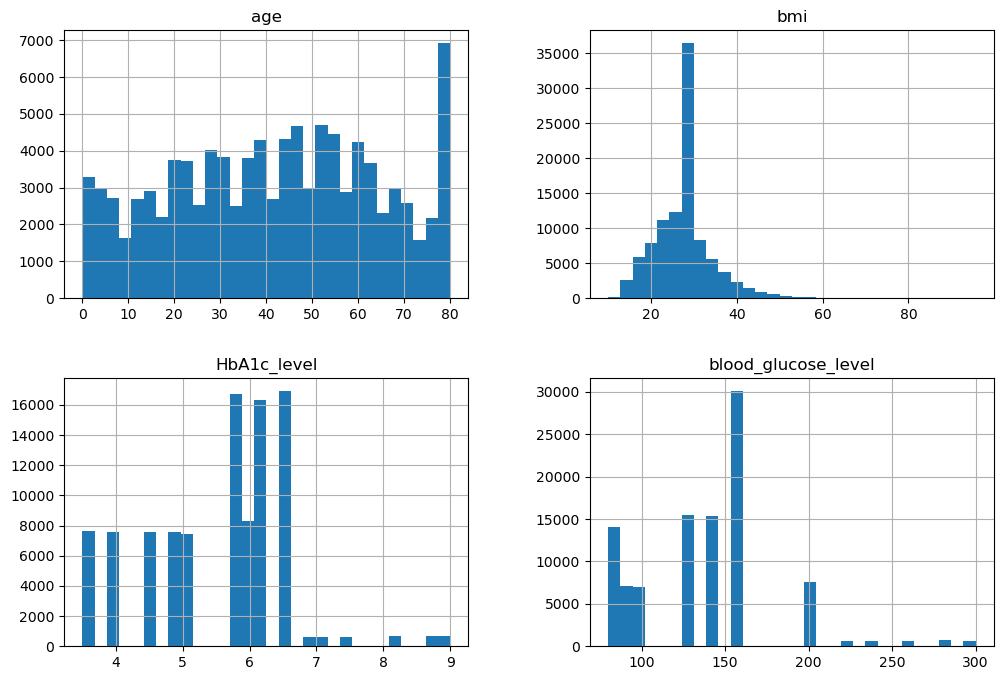

In [43]:
#using histographical representation on the numerical columns
features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
df[features].hist(figsize=(12, 8), bins=30)
plt.show()

In [34]:
#BMI calculation
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Normal"
    elif 25 <= bmi < 29.9:
        return "Overweight"
    else:
        return "Obese"

df['bmi_category'] = df['bmi'].apply(categorize_bmi)
print(df['bmi_category'].value_counts())

bmi_category
Overweight     45366
Obese          24348
Normal         21792
Underweight     8494
Name: count, dtype: int64


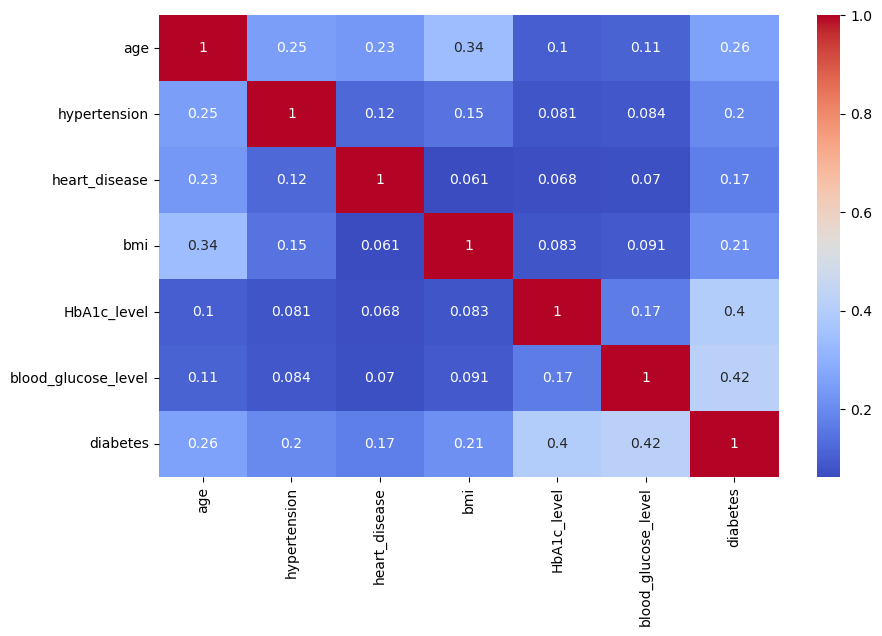

In [45]:
#Correlation matrix with Heatmap representation
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['number'])  
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()

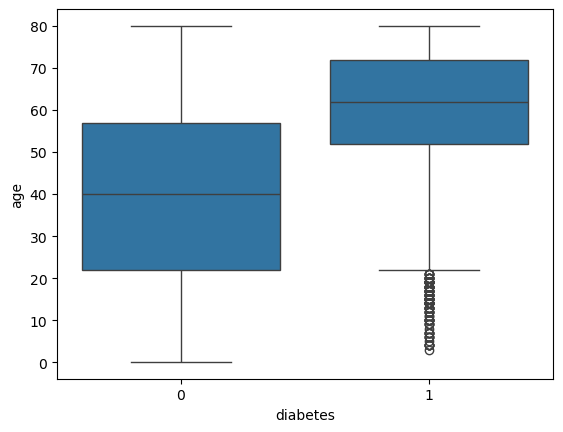

In [47]:
#Age VS Diabetes
sns.boxplot(x='diabetes', y='age', data=df)
plt.show()

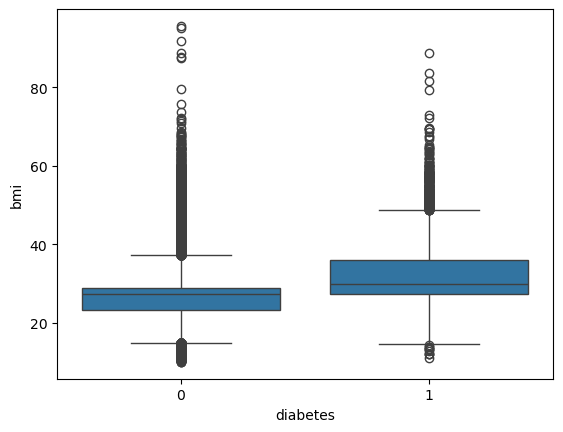

In [49]:
#BMI VS Diabetes
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.show()

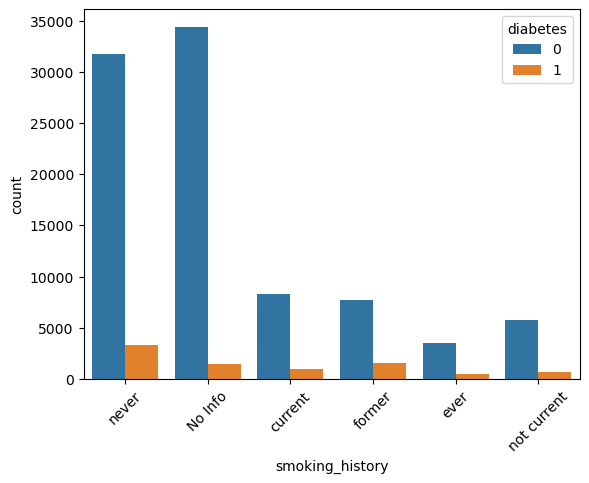

In [46]:
#Diabetic cases grouped by Smoking history
sns.countplot(x='smoking_history', hue='diabetes', data=df)
plt.xticks(rotation=45)
plt.show()

In [53]:
#Co-occurence of HT wiht Diabetes & HD with Diabetes
comorbidities = df.groupby(['hypertension', 'heart_disease'])['diabetes'].mean()
print(comorbidities)

hypertension  heart_disease
0             0                0.061494
              1                0.300397
1             0                0.263358
              1                0.390830
Name: diabetes, dtype: float64


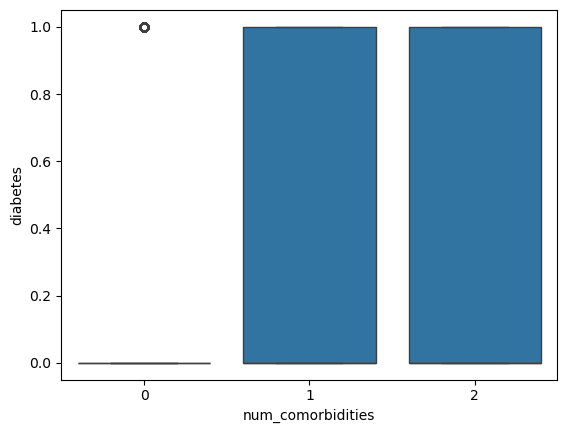

In [51]:
#Visual representaion of HT wiht Diabetes & HD with Diabetes
df['num_comorbidities'] = df['hypertension'] + df['heart_disease']
sns.boxplot(x='num_comorbidities', y='diabetes', data=df)
plt.show()

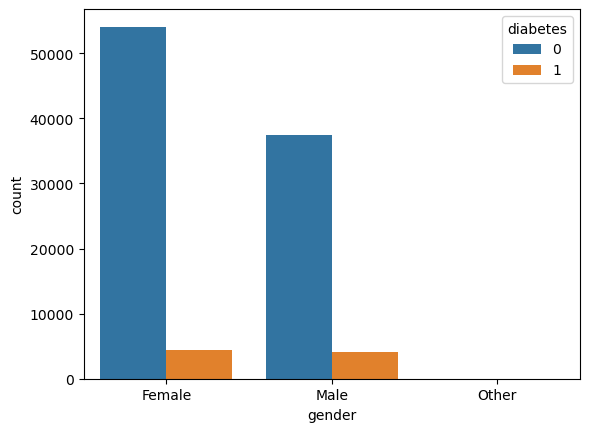

In [55]:
#Diabetic cases based on Gender values
sns.countplot(x='gender', hue='diabetes', data=df)
plt.show()

In [57]:
#Other Health catagories based on Gender
gender_means = df.groupby('gender')[['bmi', 'HbA1c_level', 'blood_glucose_level']].mean()
print(gender_means)

              bmi  HbA1c_level  blood_glucose_level
gender                                             
Female  27.449287     5.509477           137.468951
Male    27.139108     5.553041           138.890031
Other   27.379444     5.405556           139.444444


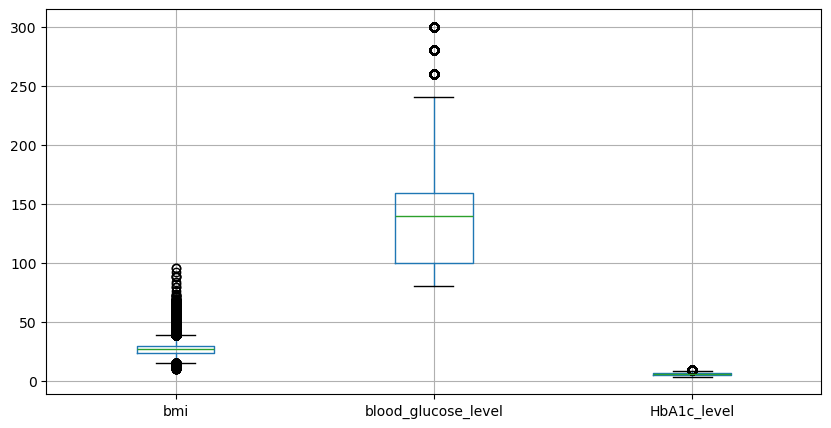

In [59]:
#Anomalies in health indiacators
df[['bmi', 'blood_glucose_level', 'HbA1c_level']].boxplot(figsize=(10, 5))
plt.show()

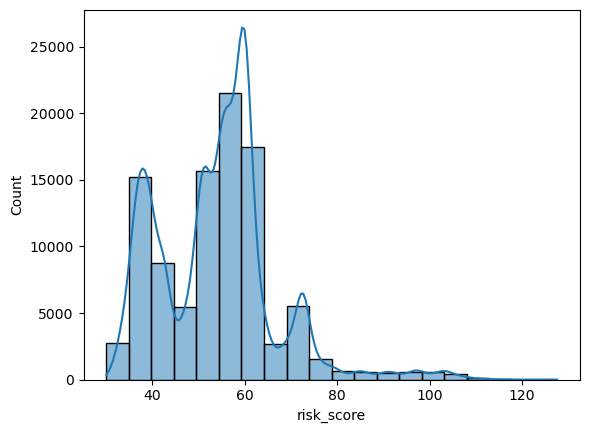

In [61]:
#Risk factors
df['risk_score'] = df['bmi'] * 0.4 + df['HbA1c_level'] * 0.3 + df['blood_glucose_level'] * 0.3
sns.histplot(df['risk_score'], bins=20, kde=True)
plt.show()

In [63]:
#Divide Age in groups
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 100], labels=["0-20", "21-40", "41-60", "61+"])
print(df['age_group'].value_counts())

age_group
41-60    29496
21-40    25968
61+      23632
0-20     20904
Name: count, dtype: int64


In [65]:
#BMI with Age & BMI with HbA1c_level
df['age_bmi_interaction'] = df['age'] * df['bmi']
df['bmi_HbA1c_interaction'] = df['bmi'] * df['HbA1c_level']

In [67]:
print(df[['age_bmi_interaction', 'bmi_HbA1c_interaction']].describe())

       age_bmi_interaction  bmi_HbA1c_interaction
count        100000.000000          100000.000000
mean           1194.773431             151.605488
std             712.289389              50.278944
min               0.884000              37.170000
25%             621.600000             116.280000
50%            1198.280000             149.386500
75%            1721.160000             177.580000
max            7100.800000             621.040000
